In [70]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib import rc
%matplotlib inline
from tqdm import tqdm
import shutil

In [19]:
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

In [2]:
# 미리 분류해놓은 샘플 데이터셋 목록 로딩
df = pd.read_csv('sample_file_name.csv')
print(len(df))
df.head()

13323


,code,name,type,pm별 위반 유형,PM,위반 유형,label_name
0,14,C001164_022_0195_C_D_F_0.jpg,위반,오토바이 탑승자_보행자도로 통행 위반,오토바이,보행자도로 통행 위반,C001164_022_0195_C_D_F_0.json
1,14,S000156_001_0192_C_N_F_0.jpg,위반,오토바이 탑승자_보행자도로 통행 위반,오토바이,보행자도로 통행 위반,S000156_001_0192_C_N_F_0.json
2,14,C004034_000_0064_C_N_F_0.jpg,위반,오토바이 탑승자_보행자도로 통행 위반,오토바이,보행자도로 통행 위반,C004034_000_0064_C_N_F_0.json
3,14,S000352_016_0308_C_D_F_0.jpg,위반,오토바이 탑승자_보행자도로 통행 위반,오토바이,보행자도로 통행 위반,S000352_016_0308_C_D_F_0.json
4,14,F000067_000_1110_C_D_F_1.jpg,위반,오토바이 탑승자_보행자도로 통행 위반,오토바이,보행자도로 통행 위반,F000067_000_1110_C_D_F_1.json


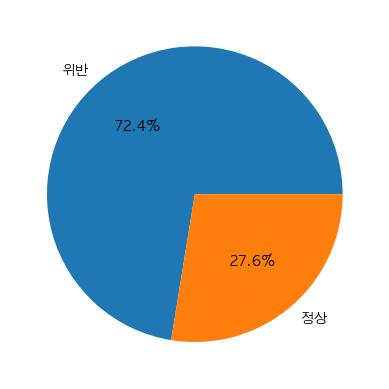

In [27]:
# 샘플 데이터 type 분포
type_rat = df.type.value_counts(normalize=True).reset_index()
plt.pie(type_rat.proportion, labels = type_rat['type'], autopct='%.1f%%')
plt.show()

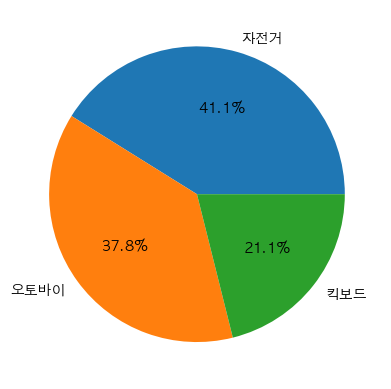

In [26]:
# 샘플 데이터 pm 분포
pm_rat = df.PM.value_counts(normalize=True).reset_index()
plt.pie(pm_rat.proportion, labels = pm_rat['PM'], autopct='%.1f%%')
plt.show()

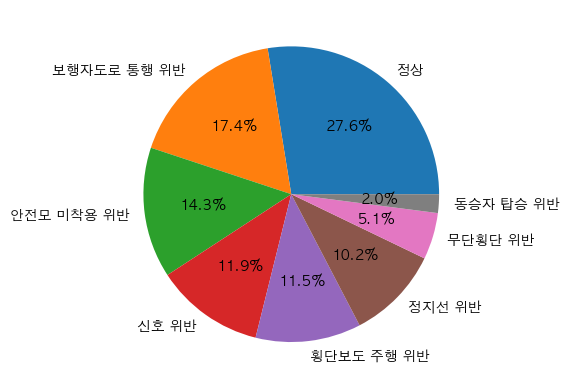

In [25]:
# 샘플 데이터 위반유형 분포
vio_rat = df['위반 유형'].value_counts(normalize=True).reset_index()
plt.pie(vio_rat.proportion, labels = vio_rat['위반 유형'], autopct='%.1f%%')
plt.show()

In [65]:
# 라벨로 사용할 위반 유형이 잘 지켜질 수 있도록 학습, 검증 데이터셋을 구축
from sklearn.model_selection import train_test_split
x_train, x_val, y_train , y_val  = train_test_split(df.drop(['위반 유형'], axis = 1), df['위반 유형'], train_size = 0.8, test_size = 0.2,
                                                    random_state=42, stratify=df['위반 유형'])
x_train.reset_index(drop = True, inplace=True)
x_val.reset_index(drop = True, inplace=True)
y_train.reset_index(drop = True, inplace=True)
y_val.reset_index(drop = True, inplace=True)
x_train.shape, x_val.shape

((10658, 6), (2665, 6))

In [49]:
x_train.head()

,code,name,type,pm별 위반 유형,PM,label_name
0,22,S002501_032_0126_C_D_F_0.jpg,위반,자전거 탑승자_보행자도로 통행 위반,자전거,S002501_032_0126_C_D_F_0.json
1,18,S000574_063_0480_C_D_F_0.jpg,위반,오토바이 탑승자_정지선 위반,오토바이,S000574_063_0480_C_D_F_0.json
2,17,C000890_000_0198_C_D_F_0.jpg,위반,오토바이 탑승자_신호 위반,오토바이,C000890_000_0198_C_D_F_0.json
3,13,S000506_004_0048_C_D_F_0.jpg,정상,오토바이 탑승자,오토바이,S000506_004_0048_C_D_F_0.json
4,23,S000801_033_0036_C_D_F_0.jpg,위반,자전거 탑승자_안전모 미착용 위반,자전거,S000801_033_0036_C_D_F_0.json


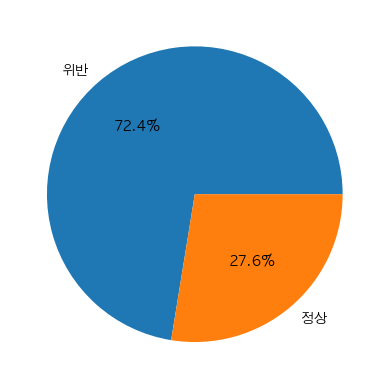

In [50]:
# 학습 데이터 type 분포
type_rat = x_train.type.value_counts(normalize=True).reset_index()
plt.pie(type_rat.proportion, labels = type_rat['type'], autopct='%.1f%%')
plt.show()

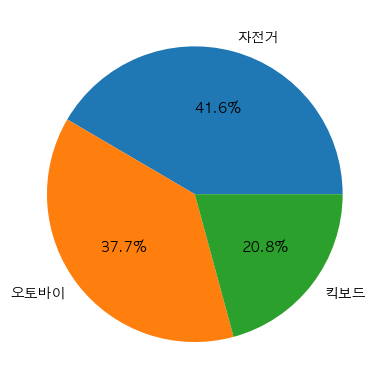

In [51]:
# 학습 데이터 pm 분포
pm_rat = x_train.PM.value_counts(normalize=True).reset_index()
plt.pie(pm_rat.proportion, labels = pm_rat['PM'], autopct='%.1f%%')
plt.show()

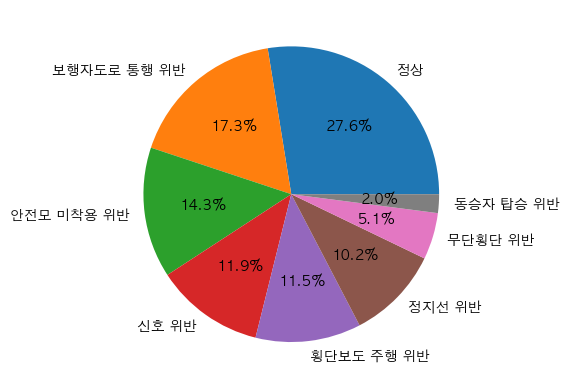

In [55]:
# 학습 데이터 위반유형 분포
vio_rat = y_train.value_counts(normalize=True).reset_index()
plt.pie(vio_rat.proportion, labels = vio_rat['위반 유형'], autopct='%.1f%%')
plt.show()

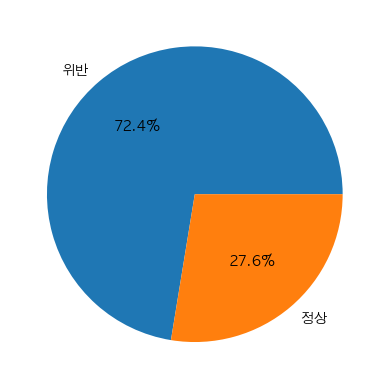

In [56]:
# 검증 데이터 type 분포
type_rat = x_val.type.value_counts(normalize=True).reset_index()
plt.pie(type_rat.proportion, labels = type_rat['type'], autopct='%.1f%%')
plt.show()

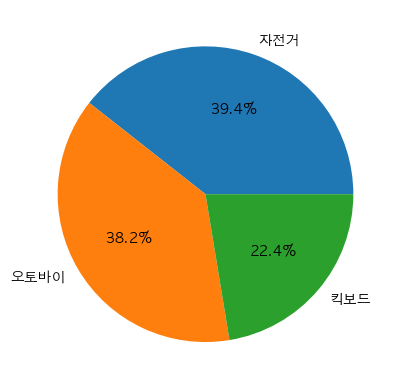

In [57]:
# 검증 데이터 pm 분포
pm_rat = x_val.PM.value_counts(normalize=True).reset_index()
plt.pie(pm_rat.proportion, labels = pm_rat['PM'], autopct='%.1f%%')
plt.show()

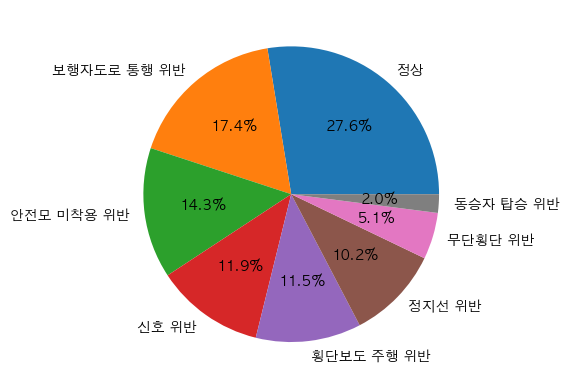

In [58]:
# 검증 데이터 위반유형 분포
vio_rat = y_val.value_counts(normalize=True).reset_index()
plt.pie(vio_rat.proportion, labels = vio_rat['위반 유형'], autopct='%.1f%%')
plt.show()

In [66]:
# 학습과 검증 데이터셋 csv 파일 구축
sample_train = pd.concat([x_train, y_train], axis = 1)
sample_val = pd.concat([x_val, y_val], axis = 1)
display(sample_train.head())
display(sample_val.head())
print(sample_train.shape, sample_val.shape)

# 파일 저장
sample_train.to_csv('sample_train_file.csv', index = False)
sample_val.to_csv('sample_val_file.csv', index = False)

,code,name,type,pm별 위반 유형,PM,label_name,위반 유형
0,22,S002501_032_0126_C_D_F_0.jpg,위반,자전거 탑승자_보행자도로 통행 위반,자전거,S002501_032_0126_C_D_F_0.json,보행자도로 통행 위반
1,18,S000574_063_0480_C_D_F_0.jpg,위반,오토바이 탑승자_정지선 위반,오토바이,S000574_063_0480_C_D_F_0.json,정지선 위반
2,17,C000890_000_0198_C_D_F_0.jpg,위반,오토바이 탑승자_신호 위반,오토바이,C000890_000_0198_C_D_F_0.json,신호 위반
3,13,S000506_004_0048_C_D_F_0.jpg,정상,오토바이 탑승자,오토바이,S000506_004_0048_C_D_F_0.json,정상
4,23,S000801_033_0036_C_D_F_0.jpg,위반,자전거 탑승자_안전모 미착용 위반,자전거,S000801_033_0036_C_D_F_0.json,안전모 미착용 위반


,code,name,type,pm별 위반 유형,PM,label_name,위반 유형
0,14,F000025_001_9989_C_D_F_1.jpg,위반,오토바이 탑승자_보행자도로 통행 위반,오토바이,F000025_001_9989_C_D_F_1.json,보행자도로 통행 위반
1,13,C001329_001_0128_C_D_F_0.jpg,정상,오토바이 탑승자,오토바이,C001329_001_0128_C_D_F_0.json,정상
2,20,S000638_018_0240_C_D_F_0.jpg,정상,자전거 탑승자,자전거,S000638_018_0240_C_D_F_0.json,정상
3,14,F000059_000_6008_C_D_F_1.jpg,위반,오토바이 탑승자_보행자도로 통행 위반,오토바이,F000059_000_6008_C_D_F_1.json,보행자도로 통행 위반
4,36,F000053_002_3782_C_D_F_1.jpg,위반,킥보드 탑승자_동승자 탑승 위반,킥보드,F000053_002_3782_C_D_F_1.json,동승자 탑승 위반


(10658, 7) (2665, 7)


In [74]:
# train 이미지 옮기기
for file_name in tqdm(sample_train.name):
    shutil.copy('./data/sample/' + file_name, './data/sample_train/images')

100%|██████████| 10658/10658 [00:29<00:00, 362.07it/s]


In [90]:
label_train = sample_train.label_name.apply(lambda x: x.replace('.json', '.txt'))
# train 라벨 옮기기
for file_name in tqdm(label_train):
    shutil.copy('./data/yolov5_label/' + file_name, './data/sample_train/labels')

100%|██████████| 10658/10658 [00:09<00:00, 1123.38it/s]


In [76]:
# val 이미지 옮기기
for file_name in tqdm(sample_val.name):
    shutil.copy('./data/sample/' + file_name, './data/sample_val/images')

100%|██████████| 2665/2665 [00:12<00:00, 219.41it/s]


In [92]:
# val 라벨 옮기기
label_val = sample_val.label_name.apply(lambda x: x.replace('.json', '.txt'))

for file_name in tqdm(label_val):
    shutil.copy('./data/yolov5_label/' + file_name, './data/sample_val/labels')

100%|██████████| 2665/2665 [00:04<00:00, 591.78it/s]


- 학습, 검증 데이터 모두 기존 데이터셋과 비슷한 위반 유형별 분포를 띈다.
- 추후 테스트셋도 구축 예정.